# Homework 5

Homework 5 exercises 8 and 9. This exercises required a Dataset told to be synthetically generated by the instructions of the task. In order to load the required dataset [*scikit-learn*](http://scikit-learn.org/stable/datasets/) will be used. The library provides a function to create artificial data to be used while studying machine learning problems. In this case the function *make_classification* allows the creation of data following the desired parameters which in this case will be used for the solution of the homework. The number of features is set to 2 so that the problem can be visualized.

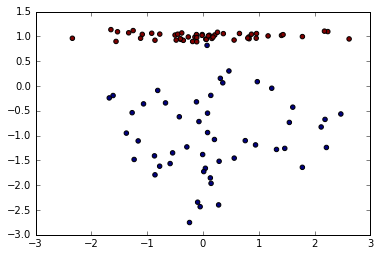

In [83]:
%matplotlib inline

import matplotlib.pyplot as pl
import numpy as np

from sklearn import linear_model, datasets
from random import randint

num_features = 2
learning_rate = 0.03
num_samples = 100
termination_threshold = 0.01

X1, Y1 = (datasets.make_classification(n_samples=num_samples, n_features=num_features, 
                                       n_redundant=0, n_informative=1,n_clusters_per_class=1) )

pl.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)

Defined draw function to plot a line in the current chart. (taken from [stackoverflow](http://stackoverflow.com/questions/9148927/matplotlib-extended-line-over-2-control-points))

In [84]:
def draw_line_2p(x,y,xlims):
    xrange = np.arange(xlims[0],xlims[1],0.1)
    A = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(A, y)[0]
    pl.plot(xrange, k*xrange + b, color='m', linestyle='-', linewidth=2)

As the instructions command, a line is added with random coordinates

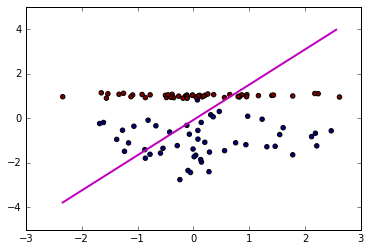

In [85]:
import random

x1 = random.uniform(0, 1)
x2 = random.uniform(0, 1)
y1 = random.uniform(0, 1)
y2 = random.uniform(0, 1)

pl.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
draw_line_2p([x1, x2], [y1, y2], [np.amin(X1[:, 0]), np.amax(X1[:, 0])])

Definition of the gradient function for logistic regression

In [86]:
def gradient(w, row_idx):
    # minus the dot product of Y1_n and X1_n
    numerator = (-Y1[row_idx] * np.array(X1[row_idx]))
    # 1 + exp(Y1_n.w.X1_n)
    denominator = 1 + np.exp(Y1[row_idx] * np.dot(np.squeeze(w),X1[row_idx]))
    return np.divide(np.array(numerator), np.array(denominator))

Definition of termination condition function. Takes into account the definition of the threshold defined as parameter for the exercise.

In [87]:
def terminate(w_t, w_t1, first_run):
    if(first_run):
        return False
    else:
        return (np.linalg.norm(np.subtract(np.array(w_t), np.array(w_t1)))) < termination_threshold
    

Definition of main function for logistic regression

In [ ]:
def logistic_regression():
    #Define weights as zero with size num_features+1
    #w = np.zeros((num_features+1,1))
    w_t = np.zeros((num_features,1))
    w_t1 = np.zeros((num_features,1))
    
    first_run = True
    
    while(not terminate(w_t, w_t1, first_run)):
        w_t = w_t1
        g = gradient(w_t,randint(0,num_samples-1))
        w_t1 = np.add(w_t,np.multiply(learning_rate, g))
    return w_t1

Main call to the process to obtain final results

In [ ]:
print(logistic_regression())